In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import missingno
import seaborn as sns
import sklearn.metrics as sm

In [2]:
dataset=pd.read_csv("HousingData.csv")

In [3]:
dataset.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


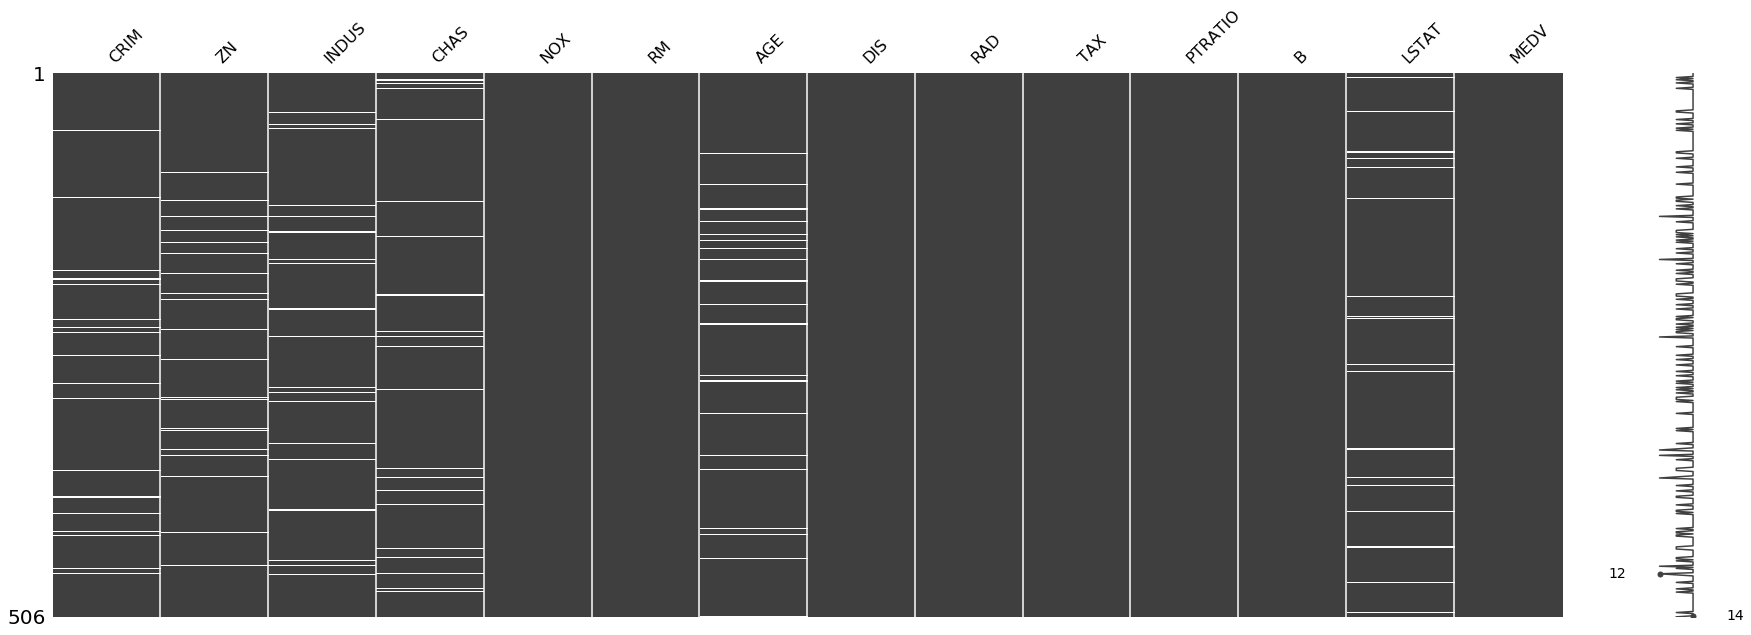

In [6]:
missingno.matrix(dataset, figsize=(30,10))

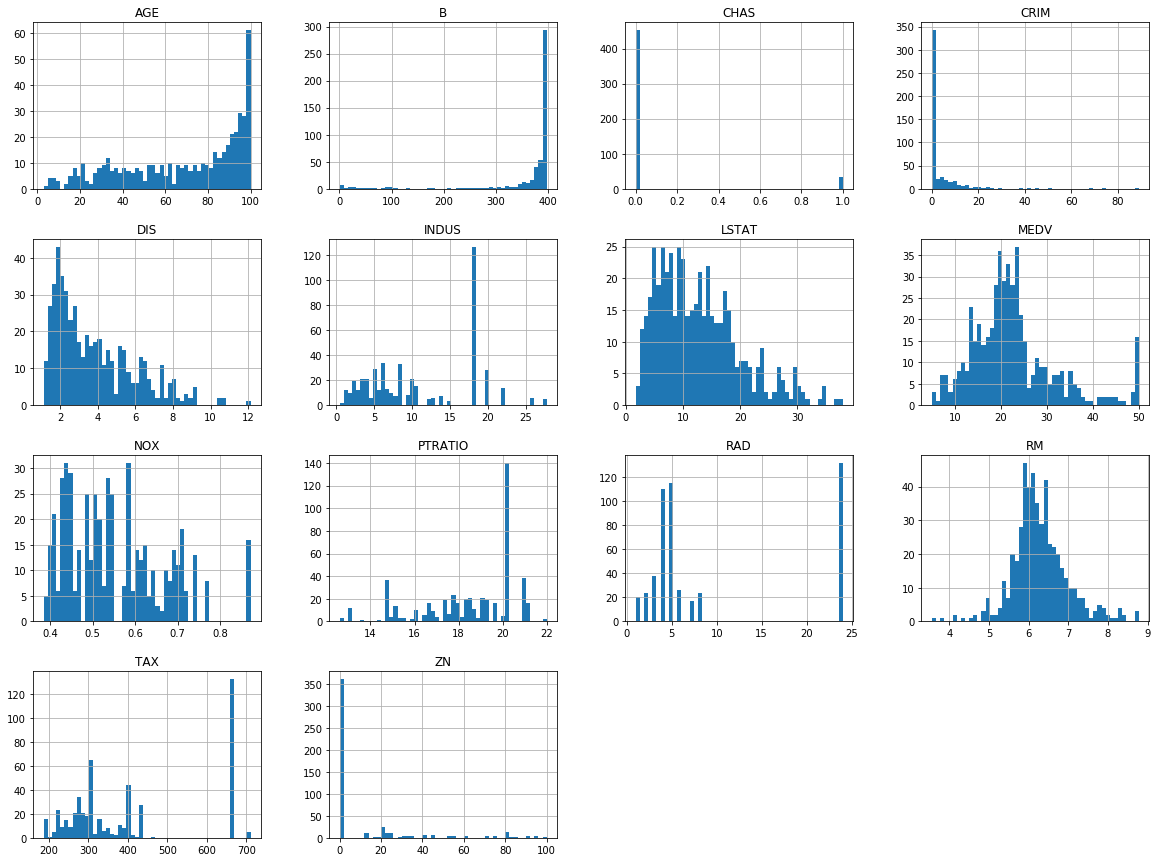

In [7]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
corr_matrix = dataset.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64

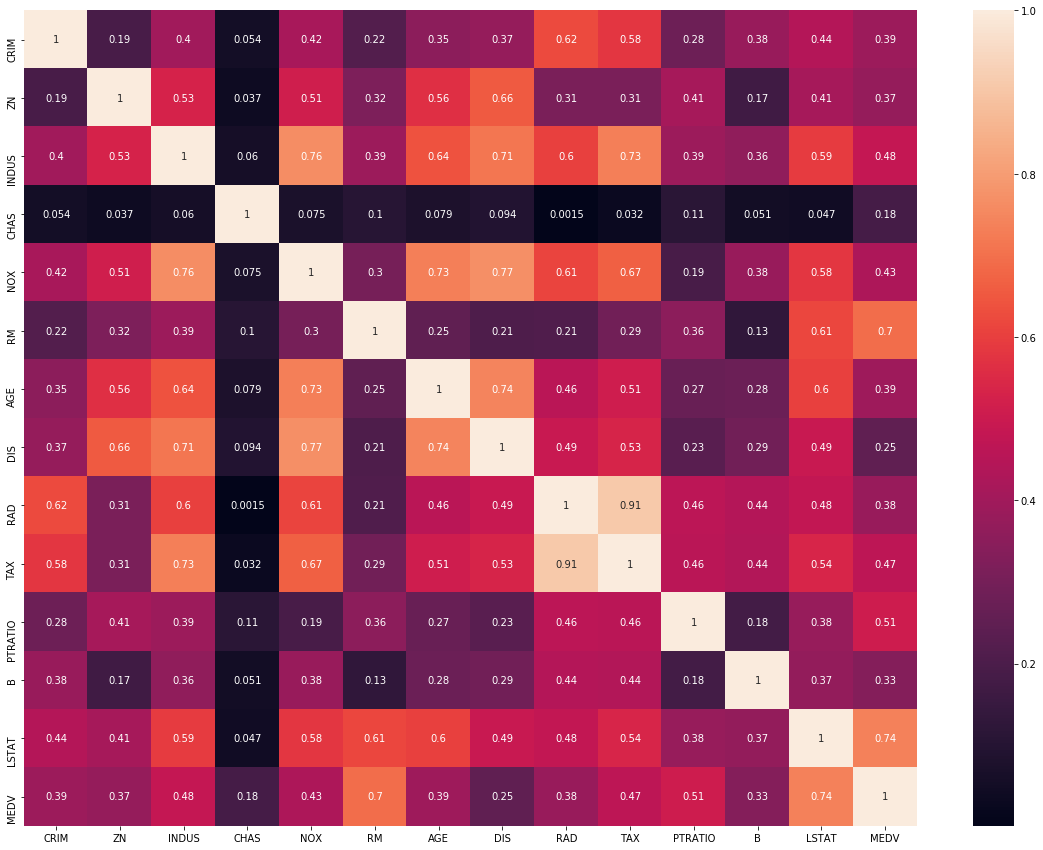

In [9]:
plt.figure(figsize=(20,15))
sns.heatmap(data=dataset.corr().abs(), annot=True)

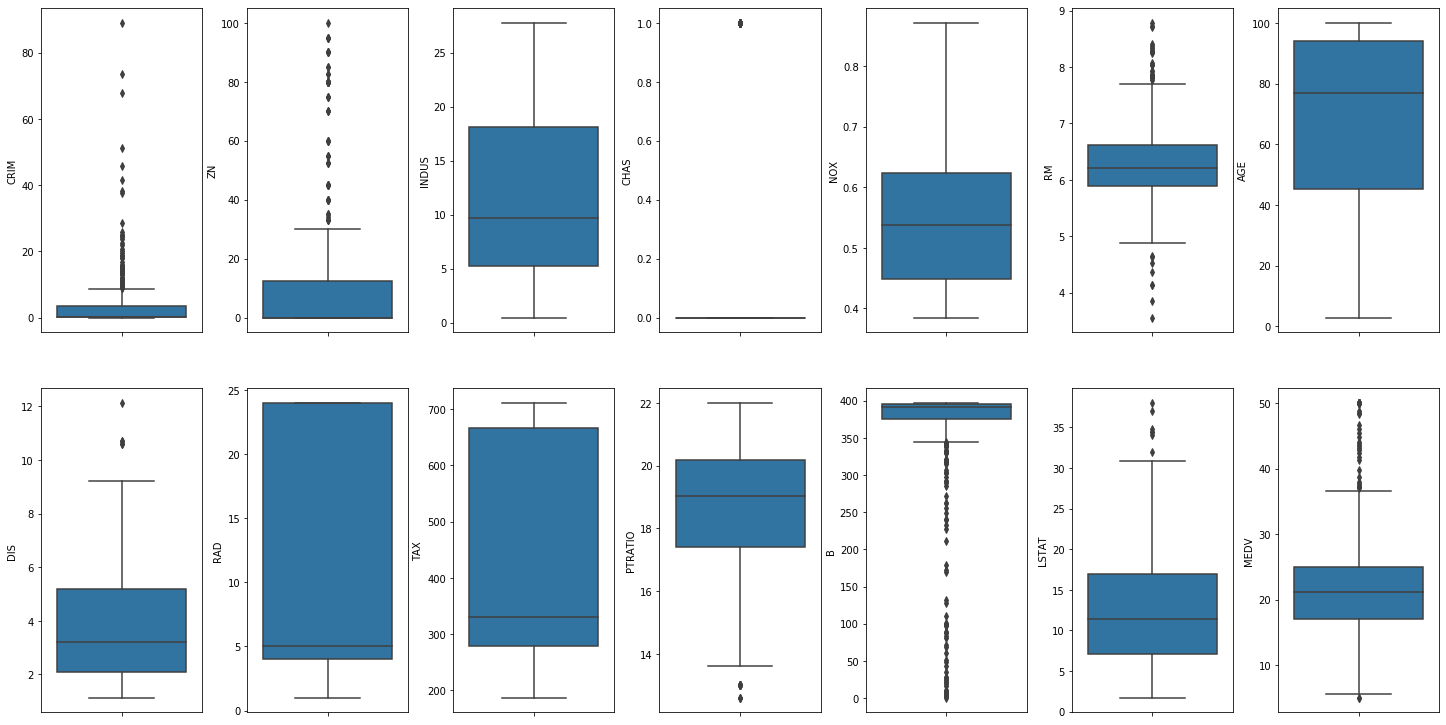

In [10]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs=axs.flatten()
for k,v in dataset.items():
    sns.boxplot(y=k, data=dataset, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [98]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,PTRATIO,B,LSTAT,MEDV
35,0.06417,0.0,5.96,0.0,0.499,5.933,3.3603,5,19.2,396.90,NaN,18.9
37,0.08014,0.0,5.96,0.0,0.499,5.850,3.9342,5,19.2,396.90,8.77,21.0
38,0.17505,0.0,5.96,0.0,0.499,5.966,3.8473,5,19.2,393.43,10.13,24.7
43,0.15936,0.0,6.91,NaN,0.448,6.211,5.7209,3,17.9,394.46,7.44,24.7
44,0.12269,0.0,6.91,0.0,0.448,6.069,5.7209,3,17.9,389.39,9.55,21.2
...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.28960,0.0,9.69,0.0,0.585,5.390,2.7986,6,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0.0,0.585,5.794,2.8927,6,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0.0,0.585,6.019,2.4091,6,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0.0,0.585,5.569,2.3999,6,19.2,395.77,15.10,17.5


In [11]:
X=dataset.iloc[:, :-1].values
y=dataset.iloc[:, -1].values
print(X)
print(y)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, :])
X[:, :] = imputer.transform(X[:, :])
print(X)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [14]:
dataset.MEDV.isnull().sum() #So y has no null value

0

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [16]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train=mm.fit_transform(X_train)
X_test=mm.transform(X_test)
print(X_train)
print(X_test)

[[1.51939061e-03 0.00000000e+00 2.36436950e-01 ... 5.63829787e-01
  9.65883302e-01 1.12582781e-01]
 [1.66494548e-03 2.50000000e-01 1.71187683e-01 ... 7.55319149e-01
  9.84315901e-01 1.41556291e-01]
 [1.88889543e-01 0.00000000e+00 6.46627566e-01 ... 8.08510638e-01
  1.00000000e+00 8.02428256e-01]
 ...
 [6.59293909e-02 0.00000000e+00 6.46627566e-01 ... 8.08510638e-01
  1.00000000e+00 4.86754967e-01]
 [3.64314305e-03 0.00000000e+00 2.10410557e-01 ... 5.10638298e-01
  9.49190579e-01 2.52483444e-01]
 [8.29719002e-04 0.00000000e+00 2.01612903e-01 ... 7.02127660e-01
  1.00000000e+00 1.94260486e-01]]
[[4.83309632e-04 3.30000000e-01 6.30498534e-02 ... 6.17021277e-01
  1.00000000e+00 1.60044150e-01]
 [2.14791792e-04 5.50000000e-01 1.21700880e-01 ... 5.31914894e-01
  1.00000000e+00 1.50386313e-01]
 [2.50590425e-03 0.00000000e+00 3.89442514e-01 ... 5.63829787e-01
  9.89510313e-01 4.71026490e-01]
 ...
 [1.14207190e-03 0.00000000e+00 2.96920821e-01 ... 8.82978723e-01
  9.91401483e-01 3.10982340e-01]

In [76]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("Successfull regression")
print("R2 Score = ", sm.r2_score(y_test, y_pred))
acc_lr = sm.r2_score(y_test, y_pred)

Successfull regression
R2 Score =  0.7436125921700663


In [77]:
from sklearn.linear_model import Ridge
regressor = Ridge(alpha = 1.0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("Regression done")
print("R2 Score = ", sm.r2_score(y_test, y_pred))
acc_rr = sm.r2_score(y_test, y_pred)

Regression done
R2 Score =  0.7331181314972703


In [78]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.1)
lassoreg.fit(X_train, y_train)
y_pred = lassoreg.predict(X_test)
print("Regression done")
print("R2 Score = ",r2_score(y_test, y_pred))
acc_lar = sm.r2_score(y_test, y_pred)

Regression done
R2 Score =  0.6778644387282406


In [79]:
from sklearn.svm import SVR
regressor_s = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("Regression done")
print("R2 Score = ", sm.r2_score(y_test, y_pred))
acc_svr = sm.r2_score(y_test, y_pred)

Regression done
R2 Score =  0.5812572590033587


In [80]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("Regression done")
print("R2-Score = ",r2_score(y_test, y_pred))
acc_dtr = sm.r2_score(y_test, y_pred)

Regression done
R2-Score =  0.8542933897228726


In [81]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("Regression Done")
print("R2 Score = ",r2_score(y_test, y_pred))
acc_rfr = sm.r2_score(y_test, y_pred)

Regression Done
R2 Score =  0.8628123922875095


In [82]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 
              'Support Vector Regression', 'Decision Tree Regression', 
              'Random Forest Regression'],
    'Score': [
        acc_lr, 
        acc_rr,  
        acc_lar, 
        acc_svr, 
        acc_dtr, 
        acc_rfr,
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Random Forest Regression,0.862812
4,Decision Tree Regression,0.854293
0,Linear Regression,0.743613
1,Ridge Regression,0.733118
2,Lasso Regression,0.677864
3,Support Vector Regression,0.581257
